In [2]:

import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from os import listdir

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

import cv2

import pickle as pkl

from PIL import Image

from random import randint as ri
from random import random as rf

from scipy.ndimage import shift, rotate

In [3]:
write_to_path = "/home/ufh6ft"
t4_data_path = "/project/mlia"

In [4]:

base_path_lbls = t4_data_path + "/T4_Data/CardiacImage_data/Training/train_myocardium_segmentations/"
base_path_inpt = t4_data_path + "/T4_Data/CardiacImage_data/Training/train_imageData/"


def read_all_files(path):
    X_temp = []
    inp_files = listdir(path)
    print(f"PATH: {path}")
    
    inp_files.sort()
    print(f"Files: {inp_files}")
    
    for f in inp_files:
        img = cv2.imread(path+f, cv2.IMREAD_GRAYSCALE)
#         resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
        X_temp.append(img)
    return X_temp, inp_files


def match_all_images(X_temp, reference):
    X = []
    for img in X_temp:
        matched = match_histograms(img, reference)
        X.append(matched)
    X = np.array(X)
    return X


X_temp, f1 = read_all_files(base_path_inpt)
# print(f"X_temp.shape={X_temp.shape}")

y1, f2 = read_all_files(base_path_lbls)
# print(f"y.shape={y.shape}")

assert(len(f1) == len(f2))
for i in range(len(f1)):
    num1 = int( f1[i][2: len(f1[i])-4] )
    num2 = int( f2[i][4: len(f2[i])-4] )
    assert(num1 == num2)


PATH: /project/mlia/T4_Data/CardiacImage_data/Training/train_imageData/
Files: ['im1.png', 'im10.png', 'im100.png', 'im101.png', 'im102.png', 'im103.png', 'im104.png', 'im105.png', 'im106.png', 'im107.png', 'im108.png', 'im109.png', 'im11.png', 'im110.png', 'im111.png', 'im112.png', 'im12.png', 'im13.png', 'im14.png', 'im15.png', 'im16.png', 'im17.png', 'im18.png', 'im19.png', 'im2.png', 'im20.png', 'im21.png', 'im22.png', 'im23.png', 'im24.png', 'im25.png', 'im26.png', 'im27.png', 'im28.png', 'im29.png', 'im3.png', 'im30.png', 'im31.png', 'im32.png', 'im33.png', 'im34.png', 'im35.png', 'im36.png', 'im37.png', 'im38.png', 'im39.png', 'im4.png', 'im40.png', 'im41.png', 'im42.png', 'im43.png', 'im44.png', 'im45.png', 'im46.png', 'im47.png', 'im5.png', 'im50.png', 'im51.png', 'im52.png', 'im53.png', 'im54.png', 'im55.png', 'im56.png', 'im57.png', 'im58.png', 'im59.png', 'im6.png', 'im64.png', 'im65.png', 'im66.png', 'im67.png', 'im68.png', 'im69.png', 'im7.png', 'im70.png', 'im71.png', 'i

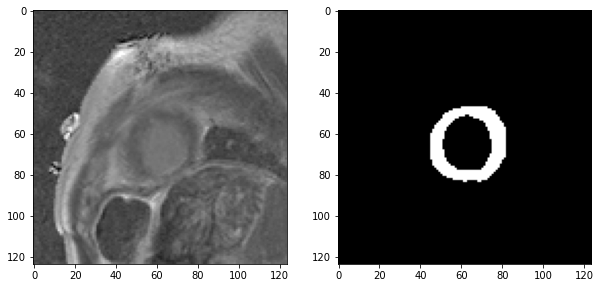

In [5]:
ind = 2
fig, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(X_temp[ind], cmap='gray', vmin=0, vmax=255)
ax[1].imshow(y1[ind], cmap='gray', vmin=0, vmax=255)
plt.show()

X shape after resize= (100, 256, 256)
y shape = (100, 256, 256)


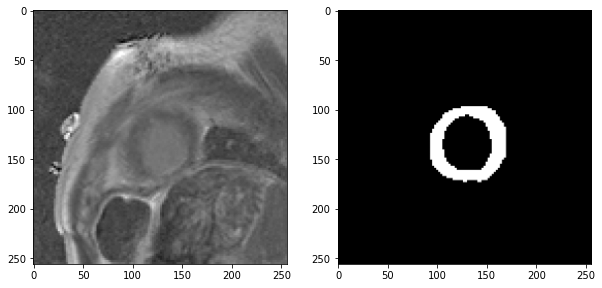

In [6]:


X = []

for x in X_temp:
    resized = cv2.resize(x, (256,256), interpolation = cv2.INTER_AREA)
    X.append(resized)
X = np.array(X)
print(f"X shape after resize= {X.shape}")

y = []

for yy in y1:
    resized = cv2.resize(yy, (256,256), interpolation = cv2.INTER_AREA)
    y.append(resized )
y = np.array(y, dtype=int)
print(f"y shape = {y.shape}")

fig, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(X[ind], cmap='gray', vmin=0, vmax=255)
ax[1].imshow(y[ind], cmap='gray', vmin=0, vmax=255)
plt.show()




In [7]:


def random_change(x, lbl):
    x2 = x.astype('float')
    x2 = x2/255.0
    lbl2 = lbl.astype('float')
    lbl2 = lbl2/255.0
    
    rint = (ri(-20,20), ri(-20, 20))
    rint_rot = ri(-20, 20) + ri(0, 1)*90 + ri(0, 1)*90
    x2 = shift(  rotate(x2, rint_rot, mode='nearest')  , rint, mode='nearest')
    lbl2 = shift(  rotate(lbl2, rint_rot, mode='nearest')  , rint, mode='nearest')

    x2 = cv2.resize(x2, (256,256), interpolation = cv2.INTER_AREA)
    
    x2[x2 < 0] = 0
    x2[x2 > 1] = 1
    
    ch = rf()
    if ch < 0.25:
#         print("sq")
        x2 = np.square(x2)
    elif ch < 0.5:
#         print("sqrt")
        x2 = np.sqrt(x2)
    
    lbl2 = cv2.resize(lbl2.astype('float'), (256,256), interpolation = cv2.INTER_AREA)
    lbl2[lbl2 > 0.5] = 1.0
    lbl2[lbl2 <= 0.5] = 0.0
    lbl2 = lbl2 * 255
    lbl2 = lbl2.astype('int64')
    
    x2 = x2*255
    x2 = x2.astype('int64')
    x2[x2 < 0] = 0
    x2[x2 > 255] = 255
    
    assert(x.shape == x2.shape)
    assert(lbl.shape == lbl2.shape)
    return x2, lbl2
 
def add_data(X, lbls, newNum = 10):
    X_new = []
    lbls_new = []
    for x in X:
        X_new.append(x)
    for l in lbls:
        lbls_new.append(l)
    for i in range(newNum):
        ind = ri(0, len(X)-1)
        x_, lbl_ = random_change(X[ind], y[ind])
        X_new.append(x_)
        lbls_new.append(lbl_)
    return np.array(X_new, dtype=int), np.array(lbls_new, dtype=int)

X, y = add_data(X, y, 4900)

print(f"X shape = {X.shape}, y shape = {y.shape}")

X shape = (5000, 256, 256), y shape = (5000, 256, 256)


X.shape=(5000, 256, 256)


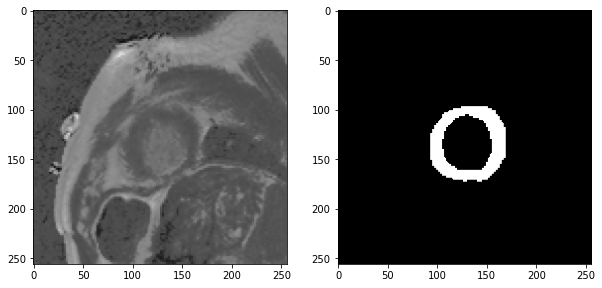

X shape = (5000, 256, 256)
y shape = (5000, 256, 256)


In [8]:
writeRefTo = write_to_path + "/mlia/data_imgs_aug/ref_file.png"

im = Image.fromarray(X[0].astype('uint8'))
im.save(writeRefTo, format="png")
    
X = match_all_images(X, X[0])
X = np.array(X, dtype=int)
print(f"X.shape={X.shape}")


# print(X[0])
y = y.astype('int64')
y[y<127] = 0
y[y>=127] = 255
assert(len(np.unique(y)) <= 2)

fig, ax = plt.subplots(1, 2, figsize=(10, 15))
ax[0].imshow(X[ind], cmap='gray', vmin=0, vmax=255)
ax[1].imshow(y[ind], cmap='gray', vmin=0, vmax=255)
plt.show()

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

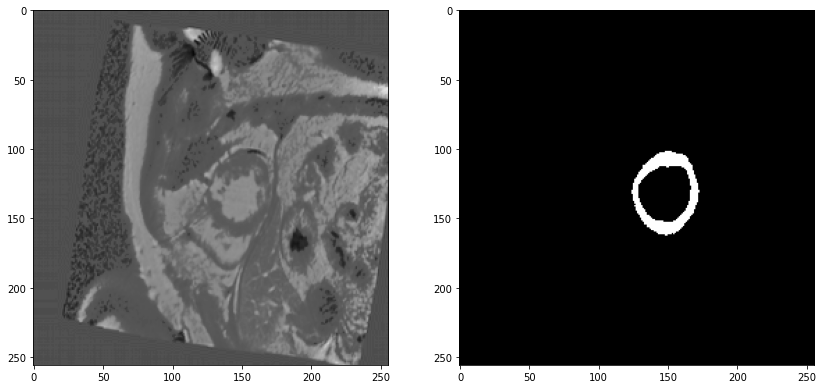

[  0 255]
<class 'numpy.int64'>
<class 'numpy.int64'>


In [9]:
f=29
x1, y1 = random_change(X[f], y[f])
x1 = match_histograms(x1, X[0])
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(x1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(y1, cmap='gray', vmin=0, vmax=255)
plt.show()
print(np.unique(y1))
print(type(y[f][0][0]))
print(type(y1[0][0]))

In [10]:
print(np.unique(y[1]))

[  0 255]


In [11]:
print(X.shape, y.shape)
print(type(X[0][0][0]), type(y[0][0][0]))

(5000, 256, 256) (5000, 256, 256)
<class 'numpy.int64'> <class 'numpy.int64'>


In [12]:

XbasePath = write_to_path + "/mlia/data_imgs_aug/train"
ybasePath = write_to_path + "/mlia/data_imgs_aug/trainannot"


In [13]:


def convert3Channel(x):
    x2 = np.zeros((256, 256, 3))
    for i in range(3):
        x2[:,:,i] = x
    return np.array(x2, dtype=int)
    
ct = 0
for j in range(len(X)):
    ct_ = "0"*(5 - len(str(ct))) + str(ct)
    if ct % 100 == 0:
        print("'"+ct_+"'", end=", ")
    x = convert3Channel(X[j])
    
    im = Image.fromarray(x.astype('uint8'))

    im.save(f"{XbasePath}/img_{ct_}.png", format="png")
    
    
    yy = convert3Channel(y[j])
    im = Image.fromarray(yy.astype('uint8'))
    
    im.save(f"{ybasePath}/img_{ct_}.png", format="png")
    
    ct +=1

'00000', '00100', '00200', '00300', '00400', '00500', '00600', '00700', '00800', '00900', '01000', '01100', '01200', '01300', '01400', '01500', '01600', '01700', '01800', '01900', '02000', '02100', '02200', '02300', '02400', '02500', '02600', '02700', '02800', '02900', '03000', '03100', '03200', '03300', '03400', '03500', '03600', '03700', '03800', '03900', '04000', '04100', '04200', '04300', '04400', '04500', '04600', '04700', '04800', '04900', 

In [14]:
ls = []
ct = 100
for j in range(20):
    ct_ = "0"*(5 - len(str(ct))) + str(ct)
    print(ct_, end=", ")
    ls.append(ct_)
    ct+=1

00100, 00101, 00102, 00103, 00104, 00105, 00106, 00107, 00108, 00109, 00110, 00111, 00112, 00113, 00114, 00115, 00116, 00117, 00118, 00119, 

00100 /home/ufh6ft/mlia/data_imgs_aug/train/img_00100.png


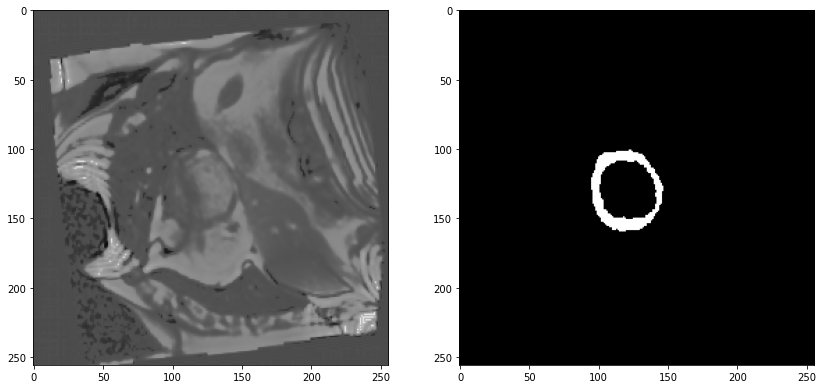

00101 /home/ufh6ft/mlia/data_imgs_aug/train/img_00101.png


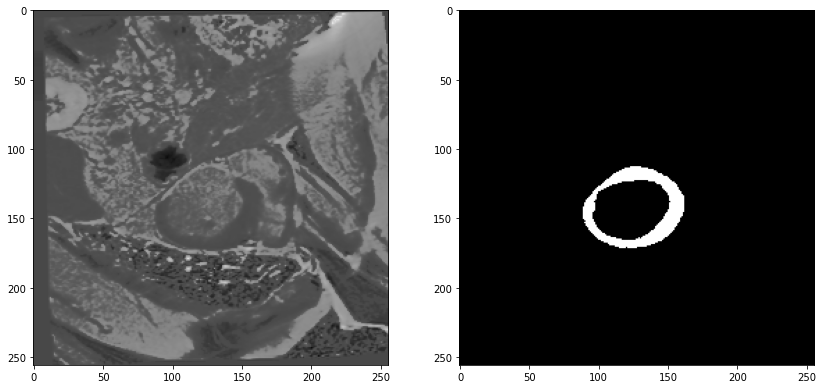

00102 /home/ufh6ft/mlia/data_imgs_aug/train/img_00102.png


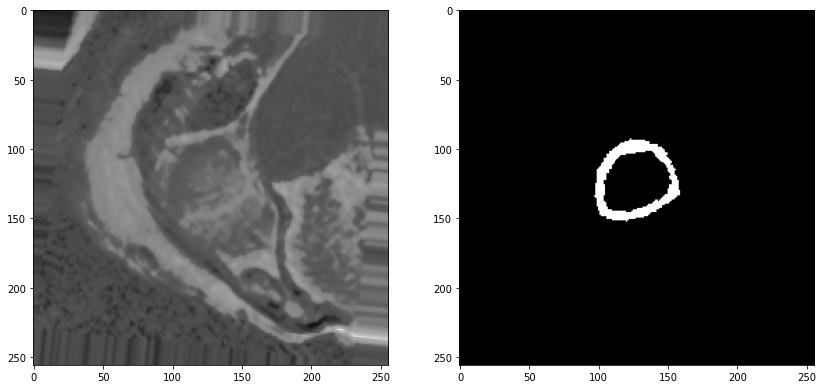

00103 /home/ufh6ft/mlia/data_imgs_aug/train/img_00103.png


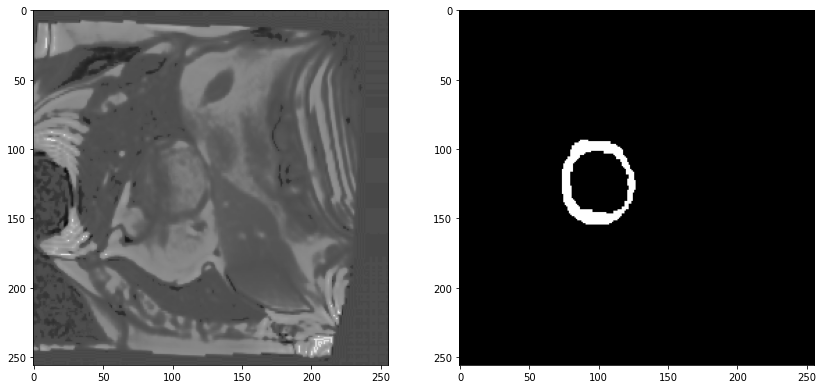

00104 /home/ufh6ft/mlia/data_imgs_aug/train/img_00104.png


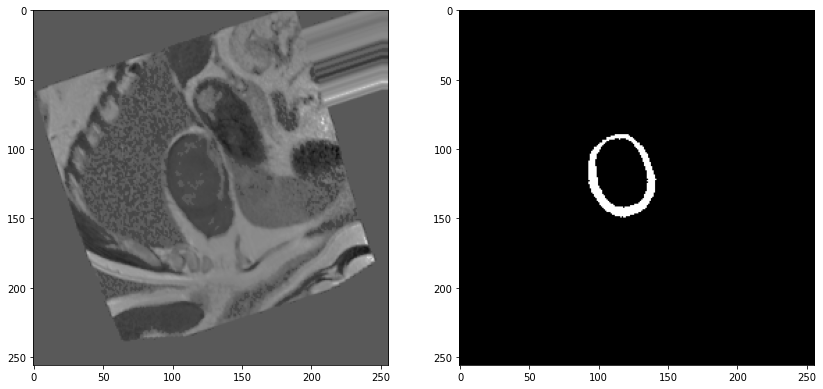

00105 /home/ufh6ft/mlia/data_imgs_aug/train/img_00105.png


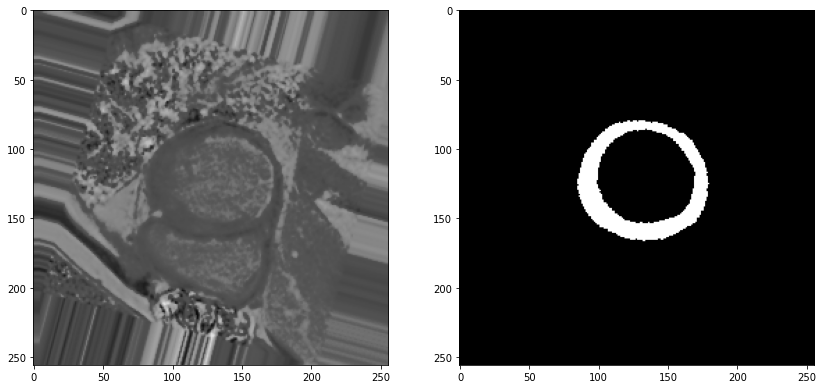

00106 /home/ufh6ft/mlia/data_imgs_aug/train/img_00106.png


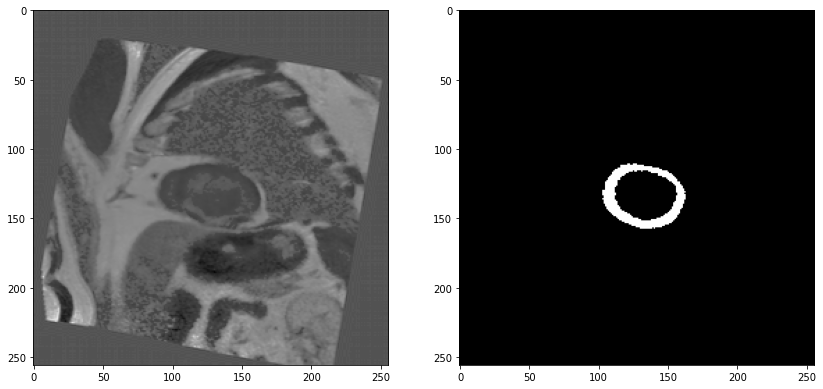

00107 /home/ufh6ft/mlia/data_imgs_aug/train/img_00107.png


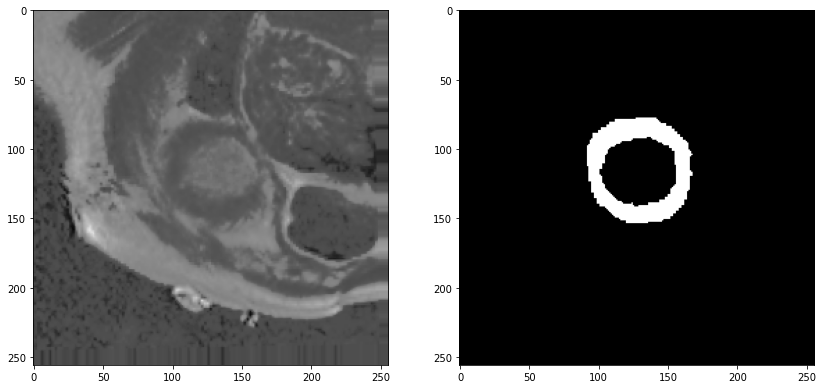

00108 /home/ufh6ft/mlia/data_imgs_aug/train/img_00108.png


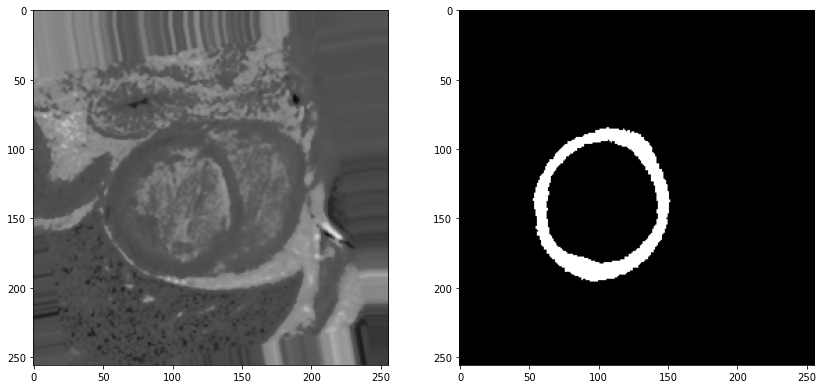

00109 /home/ufh6ft/mlia/data_imgs_aug/train/img_00109.png


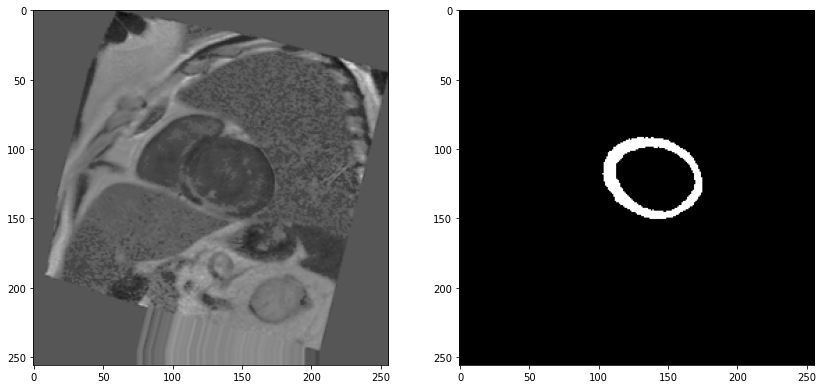

00110 /home/ufh6ft/mlia/data_imgs_aug/train/img_00110.png


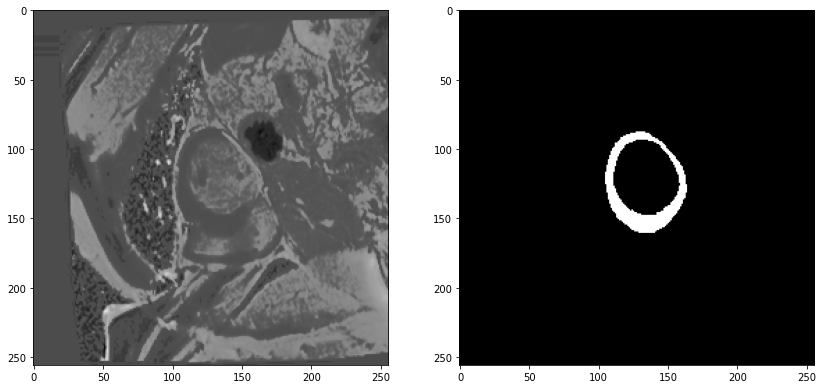

00111 /home/ufh6ft/mlia/data_imgs_aug/train/img_00111.png


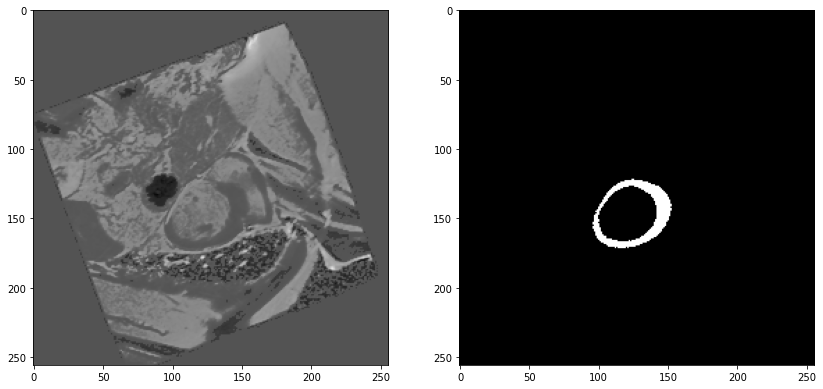

00112 /home/ufh6ft/mlia/data_imgs_aug/train/img_00112.png


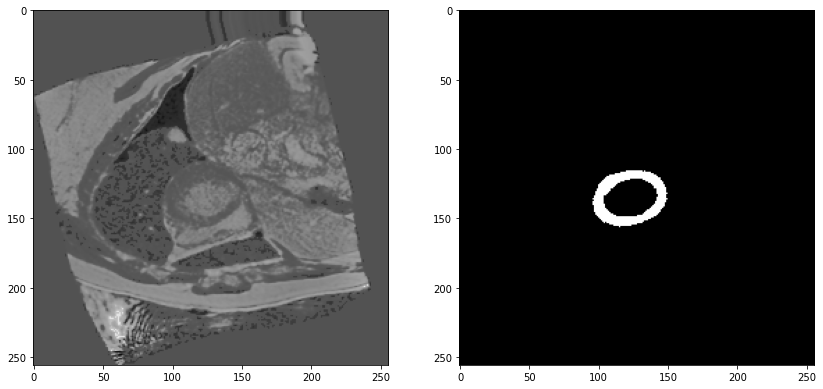

00113 /home/ufh6ft/mlia/data_imgs_aug/train/img_00113.png


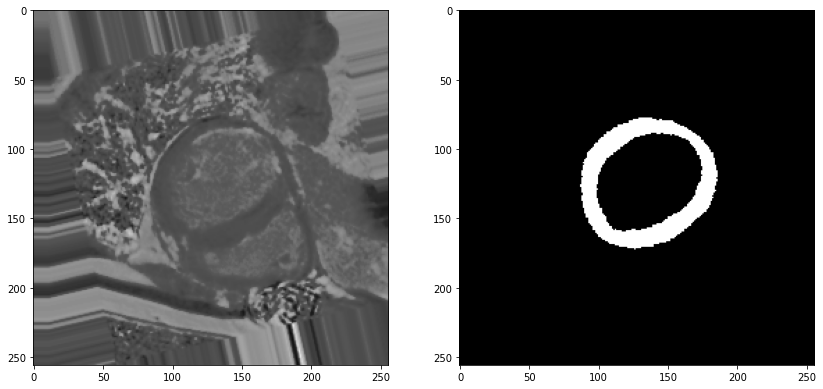

00114 /home/ufh6ft/mlia/data_imgs_aug/train/img_00114.png


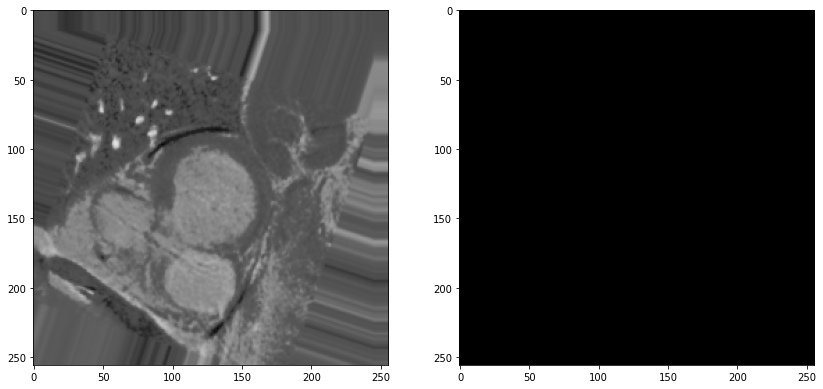

00115 /home/ufh6ft/mlia/data_imgs_aug/train/img_00115.png


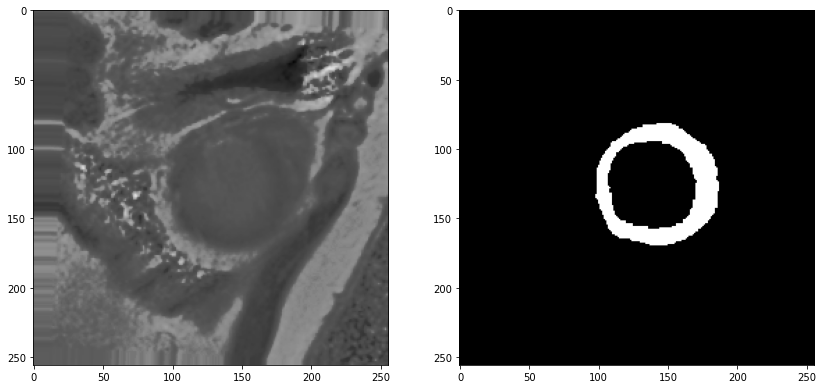

00116 /home/ufh6ft/mlia/data_imgs_aug/train/img_00116.png


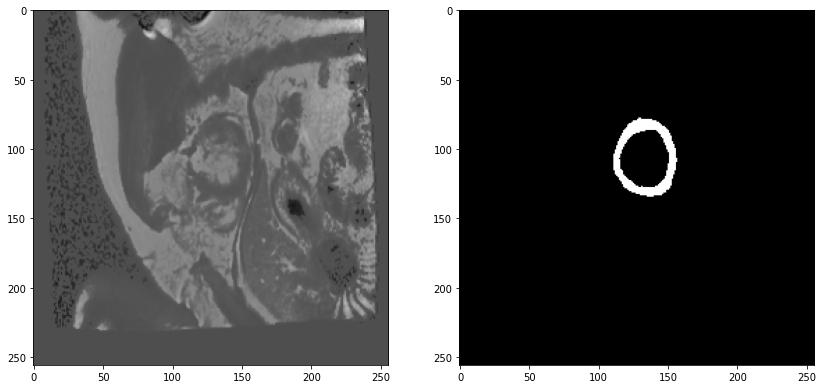

00117 /home/ufh6ft/mlia/data_imgs_aug/train/img_00117.png


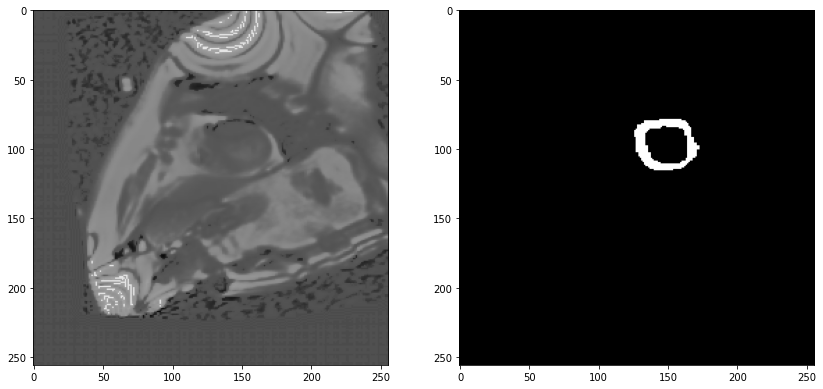

00118 /home/ufh6ft/mlia/data_imgs_aug/train/img_00118.png


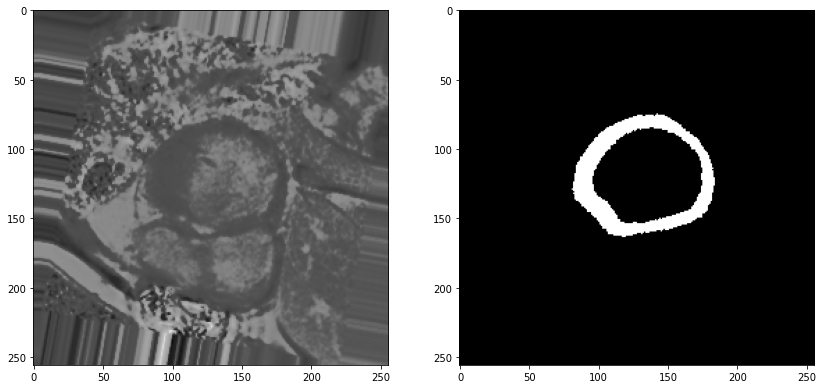

00119 /home/ufh6ft/mlia/data_imgs_aug/train/img_00119.png


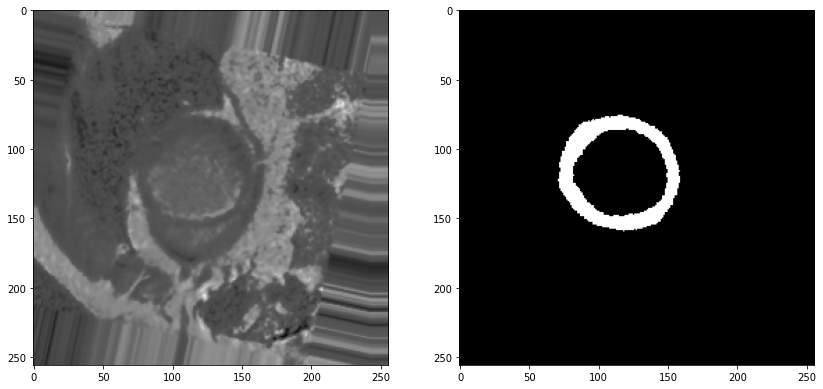

In [15]:

for ct1 in ls:
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    print(ct1, f"{XbasePath}/img_{ct1}.png")
    
    im = cv2.imread(f"{XbasePath}/img_{ct1}.png")
    ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
    im = cv2.imread(f"{ybasePath}/img_{ct1}.png")
    ax[1].imshow(im, cmap='gray', vmin=0, vmax=255)
    plt.show()
